Loading the Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the data
df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4nwin_nm_blncd.csv")

In [4]:
df_0.head()

,prov_char,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,652.786,...,3998.194,3998.676,3999.158,3999.64,4000.122,tgp_name,dgp_name,fgp_name,country_name,thnoth_name
0,KTX,ID,ID-KTX-068-2306-010_002,0.009999,0.010936,0.012060,0.013193,0.014161,0.014829,0.015131,...,-0.000237,-0.000224,-0.000193,-0.000141,-0.000068,Group 3,Group 2,Group 4,Indonesia,Non-Thai
1,KBX,ID,ID-KBX-068-2307-015_002_adah2opik,0.011787,0.012684,0.013509,0.014131,0.014446,0.014396,0.013982,...,0.000856,0.000782,0.000682,0.000577,0.000490,Group 3,Group 2,Group 4,Indonesia,Non-Thai
2,SUX,ID,ID-SUX-073-2311-001_005,0.018855,0.018050,0.017008,0.015901,0.014902,0.014138,0.013663,...,0.000310,0.000339,0.000396,0.000478,0.000577,Group 3,Group 2,Group 3,Indonesia,Non-Thai
3,KTX,ID,ID-KTX-068-2306-002_005,0.013460,0.013085,0.013149,0.013695,0.014654,0.015859,0.017094,...,-0.000523,-0.000566,-0.000579,-0.000557,-0.000494,Group 3,Group 2,Group 4,Indonesia,Non-Thai
4,KTX,ID,ID-KTX-068-2308-035_004,0.011486,0.011184,0.010776,0.010319,0.009914,0.009674,0.009681,...,-0.002519,-0.002572,-0.002616,-0.002649,-0.002678,Group 3,Group 2,Group 4,Indonesia,Non-Thai


In [5]:
df_0_selected_regions = pd.read_csv('data/data file 3/data_1.csv')
df_baseline_corrected = pd.read_csv('data/data file 3/data_1_bslcrct.csv')
df_smoothed = pd.read_csv('data/data file 3/data_1_smoothed.csv')
df_normalized = pd.read_csv('data/data file 3/data_1_normalized.csv')
df_1st_derivative = pd.read_csv('data/data file 3/data_1_1_der.csv')
df_2nd_derivative = pd.read_csv('data/data file 3/data_1_2_der.csv')
df_1_der_savgol = pd.read_csv('data/data file 3/data_1_1_der_savgol.csv')
df_2_der_savgol = pd.read_csv('data/data file 3/data_1_2_der_savgol.csv')
df_snv = pd.read_csv('data/data file 3/data_1_snv.csv')
df_rnv = pd.read_csv('data/data file 3/data_1_rnv.csv')

Step-by-Step Implementation for RandomForest Classifier with Hyperparameter Tuning

Load the Smoothed Dataset

In [6]:
# Load the smoothed dataset
df_norm_v0w = pd.read_csv('data/data file 3/data_1_2_der.csv')

In [7]:
df_norm_v0w.head()

,country_name,prov_char,2996.355,2996.837,2997.32,2997.802,2998.284,2998.766,2999.248,2999.73,...,727.514,727.996,728.478,728.961,729.443,729.925,730.407,730.889,731.371,731.853
0,Indonesia,KTX,-0.000585,-0.001055,-0.001809,-0.002241,-0.002410,-0.002337,-0.002052,-0.001592,...,-0.010663,-0.007429,0.003491,0.013613,0.011776,0.007208,0.004280,0.001097,-0.001328,-0.001736
1,Indonesia,KBX,-0.001966,-0.002824,-0.003305,-0.002411,-0.001444,-0.000705,-0.000255,0.000016,...,-0.002504,-0.000387,0.008993,0.016789,0.012443,0.004531,-0.003802,-0.012772,-0.014176,-0.010953
2,Indonesia,SUX,-0.000047,0.000281,0.001026,0.001312,0.000692,-0.000335,-0.001183,-0.001424,...,0.007658,0.003499,0.011992,0.020865,0.015954,0.005299,-0.004266,-0.015403,-0.017872,-0.014104
3,Indonesia,KTX,-0.000561,-0.000503,0.000022,0.000532,0.000278,-0.000417,-0.001081,-0.001321,...,0.010177,0.003108,0.008601,0.015226,0.008756,-0.001968,-0.008270,-0.012440,-0.011091,-0.007861
4,Indonesia,KTX,0.000353,0.000605,0.000827,0.000457,-0.000357,-0.001231,-0.001803,-0.001851,...,0.007827,0.000387,0.006052,0.013930,0.009025,0.000072,-0.004022,-0.005769,-0.004948,-0.003418


Define the Target Variable and Features

In [8]:
# Define the target_v0w variable and feature columns
target_v0w = 'country_name'
features_v0w = df_norm_v0w.columns.difference(['country_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

RandomForest Classification and Evaluation with LOGO-CV

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV RandomForest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.8076765883373312
Leave-One-Group-Out CV RandomForest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.83      0.64      0.72       126
    Thailand       0.71      0.87      0.78       126

    accuracy                           0.75       252
   macro avg       0.77      0.75      0.75       252
weighted avg       0.77      0.75      0.75       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia         81        45
Thailand          17       109
Class: Indonesia
precision: 0.826530612244898
recall: 0.6428571428571429
f1-score: 0.7232142857142857
support: 126.0

Class: Thailand
precision: 0.7077922077922078
recall: 0.8650793650793651
f1-score: 0.7785714285714286
support: 126.0

accuracy: 0.753968253968254

Class: macro avg
precision: 0.7671614100185529
recall: 0.753968253968254
f1-score: 0.7508928571428571
support: 252.0

Class: weighted avg
precision: 0.767161410018552

Implementing Different Classifiers on the Smoothed Dataset

In [10]:
import pandas as pd

# Define the target variable and feature columns
target_v0w = 'country_name'
features_v0w = df_norm_v0w.columns.difference(['country_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


Define the Evaluation Function

In [11]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def classify_and_evaluate_logo_cv(model, X, y, groups, class_labels):
    # Initialize LOGO-CV
    logo = LeaveOneGroupOut()

    # Initialize lists to store results
    accuracies = []
    y_true_all = []
    y_pred_all = []

    # Perform LOGO-CV
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict the test samples
        y_test_pred = model.predict(X_test)

        # Calculate and store test accuracies
        accuracies.append(accuracy_score(y_test, y_test_pred))

        # Store the prediction and actual value
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)

    # Calculate average accuracies
    avg_accuracy = np.mean(accuracies)

    print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

    # Generate the classification report for the overall test predictions
    report_logo = classification_report(y_true_all, y_pred_all, target_names=class_labels, output_dict=True)
    print(f"Leave-One-Group-Out CV {model.__class__.__name__} Classification Report")
    print(classification_report(y_true_all, y_pred_all, target_names=class_labels))

    # Print the confusion matrix in text format
    conf_matrix = confusion_matrix(y_true_all, y_pred_all)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print("Confusion Matrix:")
    print(conf_matrix_df)

    # Print the detailed results
    for class_name, metrics in report_logo.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_name}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{class_name}: {metrics}")
        print()


Implement and Evaluate Each Classifier

Support Vector Machine (SVM)

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0w = 'country_name'
features_v0w = df_norm_v0w.columns.difference(['country_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier with different kernel
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_svm_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

# Calculate the overall accuracy from the classification report
overall_accuracy_report = report_svm_logo['accuracy']
print(f'Overall Accuracy from Classification Report: {overall_accuracy_report}')

# Compare the accuracies
if np.isclose(avg_accuracy, overall_accuracy_report):
    print("The average test accuracy and overall accuracy from the classification report match.")
else:
    print("There is a discrepancy between the average test accuracy and overall accuracy from the classification report.")


Leave-One-Group-Out CV - Average Test Accuracy: 0.9765060849366257
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.98      0.92      0.95       126
    Thailand       0.93      0.98      0.95       126

    accuracy                           0.95       252
   macro avg       0.95      0.95      0.95       252
weighted avg       0.95      0.95      0.95       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia        116        10
Thailand           2       124
Class: Indonesia
precision: 0.9830508474576272
recall: 0.9206349206349206
f1-score: 0.9508196721311475
support: 126.0

Class: Thailand
precision: 0.9253731343283582
recall: 0.9841269841269841
f1-score: 0.9538461538461539
support: 126.0

accuracy: 0.9523809523809523

Class: macro avg
precision: 0.9542119908929927
recall: 0.9523809523809523
f1-score: 0.9523329129886506
support: 252.0

Class: weighted avg
precision: 0.9542119908929927
reca

In [13]:
# Define the target variable and feature columns
target_v0w = 'country_name'
features_v0w = df_norm_v0w.columns.difference(['country_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_svm2_all = []
y_pred_svm2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Store the prediction and actual value
    y_true_svm2_all.extend(y_test)
    y_pred_svm2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_svm2_all, y_pred_svm2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_svm1_logo = classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_svm2_all, y_pred_svm2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm1_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.9523809523809523
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.98      0.92      0.95       126
    Thailand       0.93      0.98      0.95       126

    accuracy                           0.95       252
   macro avg       0.95      0.95      0.95       252
weighted avg       0.95      0.95      0.95       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia        116        10
Thailand           2       124
Class: Indonesia
precision: 0.9830508474576272
recall: 0.9206349206349206
f1-score: 0.9508196721311475
support: 126.0

Class: Thailand
precision: 0.9253731343283582
recall: 0.9841269841269841
f1-score: 0.9538461538461539
support: 126.0

accuracy: 0.9523809523809523

Class: macro avg
precision: 0.9542119908929927
recall: 0.9523809523809523
f1-score: 0.9523329129886506
support: 252.0

Class: weighted avg
precision: 0.9542119908929927
reca

Random Forest (RF) classifier

In [14]:
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_rf2_all = []
y_pred_rf2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Store the prediction and actual value
    y_true_rf2_all.extend(y_test)
    y_pred_rf2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_rf2_all, y_pred_rf2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Random Forest Model Classification Report")
print(classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_rf2_all, y_pred_rf2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.753968253968254
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.83      0.64      0.72       126
    Thailand       0.71      0.87      0.78       126

    accuracy                           0.75       252
   macro avg       0.77      0.75      0.75       252
weighted avg       0.77      0.75      0.75       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia         81        45
Thailand          17       109
Class: Indonesia
precision: 0.826530612244898
recall: 0.6428571428571429
f1-score: 0.7232142857142857
support: 126.0

Class: Thailand
precision: 0.7077922077922078
recall: 0.8650793650793651
f1-score: 0.7785714285714286
support: 126.0

accuracy: 0.753968253968254

Class: macro avg
precision: 0.7671614100185529
recall: 0.753968253968254
f1-score: 0.7508928571428571
support: 252.0

Class: weighted avg
precision: 0.767161410018552

Extra Trees (ET) classifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Define the target variable and feature columns
target_v0u = 'country_name'
features_v0u = df_norm_v0w.columns.difference(['country_name', 'prov_char'])
X = df_norm_v0w[features_v0u]
y = df_norm_v0w[target_v0u]
groups = df_norm_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Extra Trees classifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_et_all = []
y_pred_et_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    et.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = et.predict(X_test)
    
    # Store the prediction and actual value
    y_true_et_all.extend(y_test)
    y_pred_et_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_et_all, y_pred_et_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Extra Trees Model Classification Report")
print(classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_et_all, y_pred_et_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.8849206349206349
Leave-One-Group-Out CV Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.97      0.79      0.87       126
    Thailand       0.83      0.98      0.89       126

    accuracy                           0.88       252
   macro avg       0.90      0.88      0.88       252
weighted avg       0.90      0.88      0.88       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia        100        26
Thailand           3       123
Class: Indonesia
precision: 0.970873786407767
recall: 0.7936507936507936
f1-score: 0.8733624454148472
support: 126.0

Class: Thailand
precision: 0.825503355704698
recall: 0.9761904761904762
f1-score: 0.8945454545454545
support: 126.0

accuracy: 0.8849206349206349

Class: macro avg
precision: 0.8981885710562325
recall: 0.8849206349206349
f1-score: 0.8839539499801509
support: 252.0

Class: weighted avg
precision: 0.898188571056232

k-Nearest Neighbors (kNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0u = 'country_name'
features_v0u = df_norm_v0w.columns.difference(['country_name', 'prov_char'])
X = df_norm_v0w[features_v0u]
y = df_norm_v0w[target_v0u]
groups = df_norm_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_knn_all = []
y_pred_knn_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = knn.predict(X_test)
    
    # Store the prediction and actual value
    y_true_knn_all.extend(y_test)
    y_pred_knn_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_knn_all, y_pred_knn_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV kNN Model Classification Report")
print(classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_knn_all, y_pred_knn_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.8611111111111112
Leave-One-Group-Out CV kNN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.91      0.80      0.85       126
    Thailand       0.82      0.92      0.87       126

    accuracy                           0.86       252
   macro avg       0.87      0.86      0.86       252
weighted avg       0.87      0.86      0.86       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia        101        25
Thailand          10       116
Class: Indonesia
precision: 0.9099099099099099
recall: 0.8015873015873016
f1-score: 0.8523206751054853
support: 126.0

Class: Thailand
precision: 0.8226950354609929
recall: 0.9206349206349206
f1-score: 0.8689138576779026
support: 126.0

accuracy: 0.8611111111111112

Class: macro avg
precision: 0.8663024726854514
recall: 0.8611111111111112
f1-score: 0.860617266391694
support: 252.0

Class: weighted avg
precision: 0.8663024726854515
recal

Gradient Boosting Classifier (GBC)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_gbc = []
y_true_all_gbc = []
y_pred_all_gbc = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_gbc.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_gbc.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_gbc.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_gbc.extend(y_test)
    y_pred_all_gbc.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_gbc = accuracy_score(y_true_all_gbc, y_pred_all_gbc)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_gbc}')
print("Leave-One-Group-Out CV GBC Model Classification Report")
report_gbc_logo = classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_gbc = confusion_matrix(y_true_all_gbc, y_pred_all_gbc)
df_cm_gbc = pd.DataFrame(cm_logo_gbc, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_gbc)

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.7261904761904762
Leave-One-Group-Out CV GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.74      0.70      0.72       126
    Thailand       0.71      0.75      0.73       126

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia         88        38
Thailand          31        95
Class: Indonesia
precision: 0.7394957983193278
recall: 0.6984126984126984
f1-score: 0.7183673469387755
support: 126.0

Class: Thailand
precision: 0.7142857142857143
recall: 0.753968253968254
f1-score: 0.7335907335907336
support: 126.0

accuracy: 0.7261904761904762

Class: macro avg
precision: 0.7268907563025211
recall: 0.7261904761904762
f1-score: 0.7259790402647546
support: 252.0

Class: weighted avg
precision: 0.7268907563025211
recal

LightGBM (LGBM) classifier 

In [18]:
import lightgbm as lgb
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LightGBM Classifier
model_lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lgbm = []
y_true_all_lgbm = []
y_pred_all_lgbm = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lgbm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lgbm.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lgbm.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lgbm.extend(y_test)
    y_pred_all_lgbm.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lgbm = accuracy_score(y_true_all_lgbm, y_pred_all_lgbm)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lgbm}')
print("Leave-One-Group-Out CV LGBM Model Classification Report")
report_lgbm_logo = classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lgbm = confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm)
df_cm_lgbm = pd.DataFrame(cm_logo_lgbm, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lgbm)

# Display the detailed results
for class_name, metrics in report_lgbm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Number of positive: 126, number of negative: 108
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 125011
[LightGBM] [Info] Number of data points in the train set: 234, number of used features: 1576
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

Linear Discriminant Analysis (LDA) classifier

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_lda = []
y_pred_all_lda = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lda.extend(y_test)
    y_pred_all_lda.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lda = accuracy_score(y_true_all_lda, y_pred_all_lda)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lda}')
print("Leave-One-Group-Out CV LDA Model Classification Report")
report_lda_logo = classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lda = confusion_matrix(y_true_all_lda, y_pred_all_lda)
df_cm_lda = pd.DataFrame(cm_logo_lda, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lda)

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.34523809523809523
Leave-One-Group-Out CV LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.34      0.32      0.33       126
    Thailand       0.35      0.37      0.36       126

    accuracy                           0.35       252
   macro avg       0.34      0.35      0.34       252
weighted avg       0.34      0.35      0.34       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia         40        86
Thailand          79        47
Class: Indonesia
precision: 0.33613445378151263
recall: 0.31746031746031744
f1-score: 0.32653061224489793
support: 126.0

Class: Thailand
precision: 0.3533834586466165
recall: 0.373015873015873
f1-score: 0.36293436293436293
support: 126.0

accuracy: 0.34523809523809523

Class: macro avg
precision: 0.3447589562140646
recall: 0.34523809523809523
f1-score: 0.34473248758963043
support: 252.0

Class: weighted avg
precision: 0.34475895621406

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_ldar = []
y_pred_all_ldar = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_ldar.extend(y_test)
    y_pred_all_ldar.extend(y_test_pred)

# Reverse the predicted classes
y_pred_all_ldar_reversed = [1 - y for y in y_pred_all_ldar]

# Calculate the overall accuracy for the reversed predictions
overall_accuracy_lda_reversed = accuracy_score(y_true_all_ldar, y_pred_all_ldar_reversed)

print(f'Leave-One-Group-Out CV - Average Test Accuracy (Reversed Classes): {overall_accuracy_lda_reversed}')
print("Leave-One-Group-Out CV LDA Model Classification Report (Reversed Classes)")
report_lda_logo_reversed = classification_report(y_true_all_ldar, y_pred_all_ldar_reversed, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_ldar, y_pred_all_ldar_reversed, target_names=le.classes_))

# Generate and display the confusion matrix for the reversed predictions
cm_logo_lda_reversed = confusion_matrix(y_true_all_ldar, y_pred_all_ldar_reversed)
df_cm_lda_reversed = pd.DataFrame(cm_logo_lda_reversed, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Reversed Classes):")
print(df_cm_lda_reversed)

# Display the detailed results for the reversed predictions
for class_name, metrics in report_lda_logo_reversed.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy (Reversed Classes): 0.6547619047619048
Leave-One-Group-Out CV LDA Model Classification Report (Reversed Classes)
              precision    recall  f1-score   support

   Indonesia       0.65      0.68      0.66       126
    Thailand       0.66      0.63      0.64       126

    accuracy                           0.65       252
   macro avg       0.66      0.65      0.65       252
weighted avg       0.66      0.65      0.65       252

Confusion Matrix (Reversed Classes):
           Indonesia  Thailand
Indonesia         86        40
Thailand          47        79
Class: Indonesia
precision: 0.6466165413533834
recall: 0.6825396825396826
f1-score: 0.6640926640926641
support: 126.0

Class: Thailand
precision: 0.6638655462184874
recall: 0.626984126984127
f1-score: 0.6448979591836734
support: 126.0

accuracy: 0.6547619047619048

Class: macro avg
precision: 0.6552410437859354
recall: 0.6547619047619048
f1-score: 0.6544953116381688
support: 252.0

Logistic Regression classifier

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Initialize Logistic Regression model with a different solver
logreg_model = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear')

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
test_accuracies_logreg = []
y_true_all_logreg = []
y_pred_all_logreg = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_scaled, y, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    logreg_model.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = logreg_model.predict(X_test)
    
    # Calculate and store test accuracies
    test_accuracies_logreg.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all_logreg.extend(y_test)
    y_pred_all_logreg.extend(y_test_pred)

# Flip the predictions
y_pred_lg_flipped = ['Indonesia' if pred == 'Thailand' else 'Thailand' for pred in y_pred_all_logreg]

# Generate the classification report for the flipped predictions
report_logreg_flipped = classification_report(y_true_all_logreg, y_pred_lg_flipped, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Logistic Regression Model (Flipped) Classification Report")
print(classification_report(y_true_all_logreg, y_pred_lg_flipped, target_names=le.classes_))

# Generate and display the confusion matrix for the flipped predictions
cm_logreg_flipped = confusion_matrix(y_true_all_logreg, y_pred_lg_flipped)
df_cm_logreg_flipped = pd.DataFrame(cm_logreg_flipped, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Flipped):")
print(df_cm_logreg_flipped)

# Display the detailed results for the flipped predictions
for class_name, metrics in report_logreg_flipped.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV Logistic Regression Model (Flipped) Classification Report
              precision    recall  f1-score   support

   Indonesia       0.90      0.90      0.90       126
    Thailand       0.90      0.90      0.90       126

    accuracy                           0.90       252
   macro avg       0.90      0.90      0.90       252
weighted avg       0.90      0.90      0.90       252

Confusion Matrix (Flipped):
           Indonesia  Thailand
Indonesia        113        13
Thailand          12       114
Class: Indonesia
precision: 0.904
recall: 0.8968253968253969
f1-score: 0.900398406374502
support: 126.0

Class: Thailand
precision: 0.8976377952755905
recall: 0.9047619047619048
f1-score: 0.9011857707509882
support: 126.0

accuracy: 0.9007936507936508

Class: macro avg
precision: 0.9008188976377953
recall: 0.9007936507936508
f1-score: 0.9007920885627451
support: 252.0

Class: weighted avg
precision: 0.9008188976377952
recall: 0.9007936507936508
f1-score: 0.9007920885

ConfusionMatrixDisplay

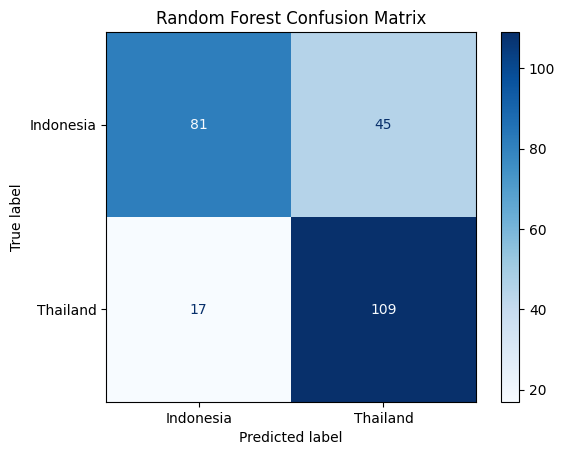

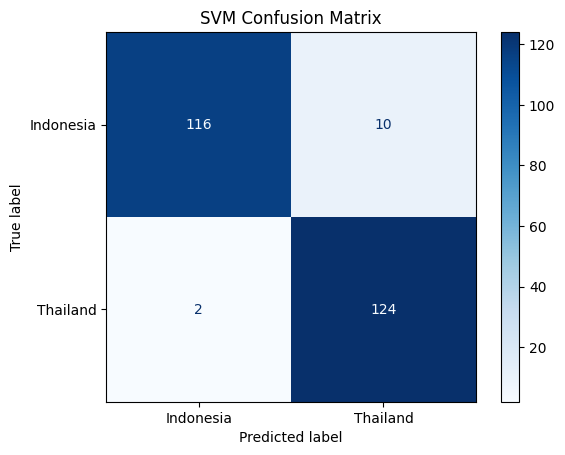

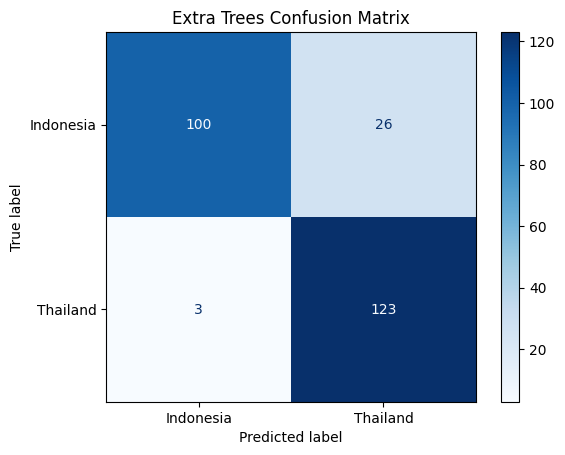

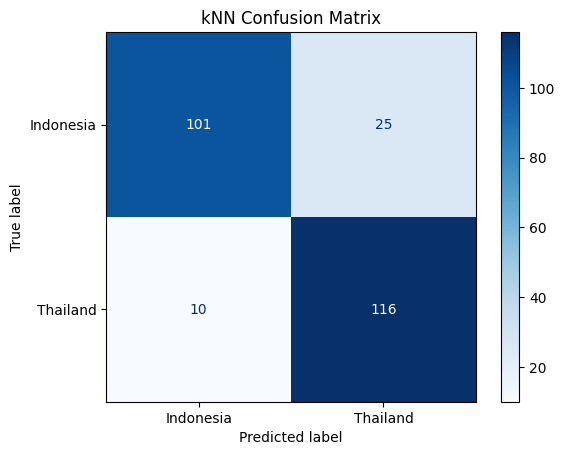

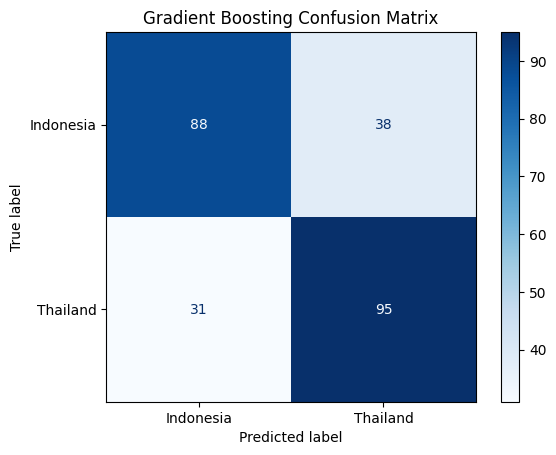

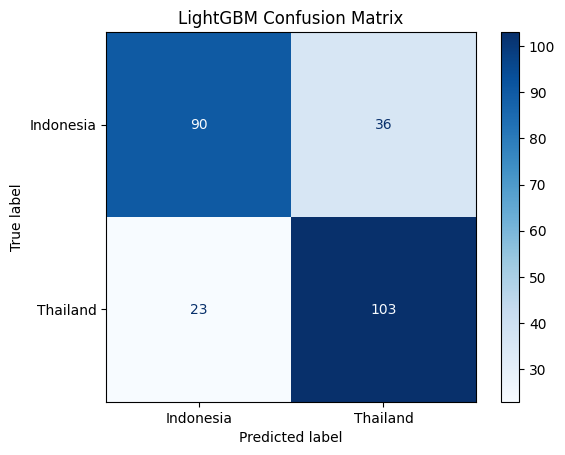

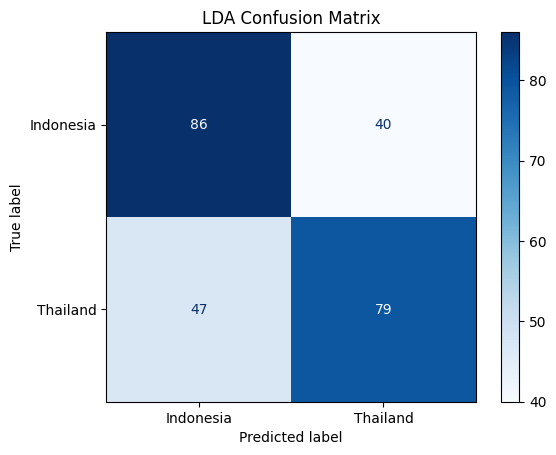

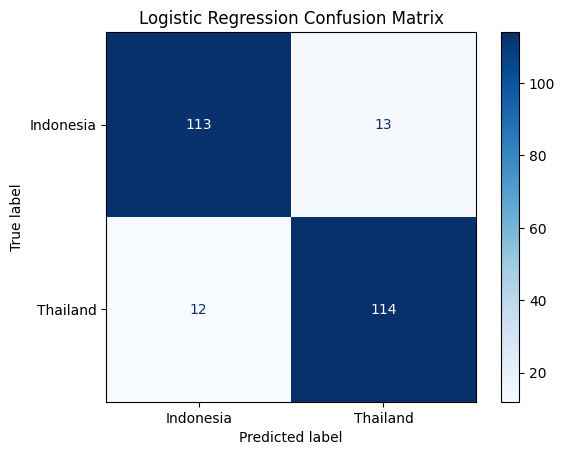

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have the true labels and predictions for each classifier stored in the following variables:
# y_true_rf, y_pred_rf
# y_true_svm, y_pred_svm
# y_true_et, y_pred_et
# y_true_knn, y_pred_knn
# y_true_gbc, y_pred_gbc
# y_true_lgbm, y_pred_lgbm
# y_true_lda, y_pred_lda
# y_true_logreg, y_pred_logreg

# y_true_rf2_all, y_pred_rf2_all
# y_true_svm2_all,  y_pred_svm2_all
# y_true_et_all, y_pred_et_all
# y_true_knn_all, y_pred_knn_all
# y_true_all_gbc, y_pred_all_gbc
# y_true_all_lgbm, y_pred_all_lgbm
# y_true_all_ldar, y_pred_all_ldar_reversed
# y_true_all_logreg, y_pred_lg_flipped

# Define the class labels
class_labels = le.classes_

# Function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Display confusion matrices for each classifier
display_confusion_matrix(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix(y_true_all_ldar, y_pred_all_ldar_reversed, 'LDA Confusion Matrix')
display_confusion_matrix(y_true_all_logreg, y_pred_lg_flipped, 'Logistic Regression Confusion Matrix')


Displaying Confusion Matrices as Text Tables

In [23]:
# Function to display confusion matrix as a text table
def display_confusion_matrix_text(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    print(title)
    print(df_cm)
    print()

# Display confusion matrices for each classifier as text tables
display_confusion_matrix_text(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix_text(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix_text(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix_text(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix_text(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix_text(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix_text(y_true_all_ldar, y_pred_all_ldar_reversed, 'LDA Confusion Matrix')
display_confusion_matrix_text(y_true_all_logreg, y_pred_lg_flipped, 'Logistic Regression Confusion Matrix')


Random Forest Confusion Matrix
           Indonesia  Thailand
Indonesia         81        45
Thailand          17       109

SVM Confusion Matrix
           Indonesia  Thailand
Indonesia        116        10
Thailand           2       124

Extra Trees Confusion Matrix
           Indonesia  Thailand
Indonesia        100        26
Thailand           3       123

kNN Confusion Matrix
           Indonesia  Thailand
Indonesia        101        25
Thailand          10       116

Gradient Boosting Confusion Matrix
           Indonesia  Thailand
Indonesia         88        38
Thailand          31        95

LightGBM Confusion Matrix
           Indonesia  Thailand
Indonesia         90        36
Thailand          23       103

LDA Confusion Matrix
           Indonesia  Thailand
Indonesia         86        40
Thailand          47        79

Logistic Regression Confusion Matrix
           Indonesia  Thailand
Indonesia        113        13
Thailand          12       114



Classification Report

In [24]:
from sklearn.metrics import classification_report

# Assuming you have these classification reports stored
# classification_report_rf = ...
# classification_report_svm = ...
# classification_report_et = ...
# classification_report_knn = ...
# classification_report_gbc = ...
# classification_report_lgbm = ...
# classification_report_lda = ...
# classification_report_logreg = ...

# Function to display classification report
def display_classification_report(report, model_name):
    print(f"Classification Report for {model_name}")
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {label}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{label}: {metrics}")
        print()

# Call the function for each classifier
display_classification_report(report_rf_logo, "Random Forest")
display_classification_report(report_svm1_logo, "SVM")
display_classification_report(report_et_logo, "Extra Trees")
display_classification_report(report_knn_logo, "k-Nearest Neighbors")
display_classification_report(report_gbc_logo, "Gradient Boosting Classifier")
display_classification_report(report_lgbm_logo, "LightGBM")
display_classification_report(report_lda_logo_reversed, "Linear Discriminant Analysis")
display_classification_report(report_logreg_flipped, "Logistic Regression")


Classification Report for Random Forest
Class: Indonesia
precision: 0.826530612244898
recall: 0.6428571428571429
f1-score: 0.7232142857142857
support: 126.0

Class: Thailand
precision: 0.7077922077922078
recall: 0.8650793650793651
f1-score: 0.7785714285714286
support: 126.0

accuracy: 0.753968253968254

Class: macro avg
precision: 0.7671614100185529
recall: 0.753968253968254
f1-score: 0.7508928571428571
support: 252.0

Class: weighted avg
precision: 0.7671614100185529
recall: 0.753968253968254
f1-score: 0.7508928571428571
support: 252.0

Classification Report for SVM
Class: Indonesia
precision: 0.9830508474576272
recall: 0.9206349206349206
f1-score: 0.9508196721311475
support: 126.0

Class: Thailand
precision: 0.9253731343283582
recall: 0.9841269841269841
f1-score: 0.9538461538461539
support: 126.0

accuracy: 0.9523809523809523

Class: macro avg
precision: 0.9542119908929927
recall: 0.9523809523809523
f1-score: 0.9523329129886506
support: 252.0

Class: weighted avg
precision: 0.9542119

IMPORTANCE

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_svm_all = []
y_pred_svm_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Store the prediction and actual value
    y_true_svm_all.extend(y_test)
    y_pred_svm_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_svm_all, y_pred_svm_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_svm_logo = classification_report(y_true_svm_all, y_pred_svm_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_svm_all, y_pred_svm_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_svm_all, y_pred_svm_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)


Leave-One-Group-Out CV - Overall Test Accuracy: 0.9523809523809523
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.98      0.92      0.95       126
    Thailand       0.93      0.98      0.95       126

    accuracy                           0.95       252
   macro avg       0.95      0.95      0.95       252
weighted avg       0.95      0.95      0.95       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia        116        10
Thailand           2       124


       Feature  Importance
1575   731.853         0.0
0     1088.137         0.0
1      1088.62         0.0
2     1089.102         0.0
3     1089.584         0.0
4     1090.066         0.0
5     1090.548         0.0
6      1091.03         0.0
1559   724.139         0.0
1558   723.657         0.0


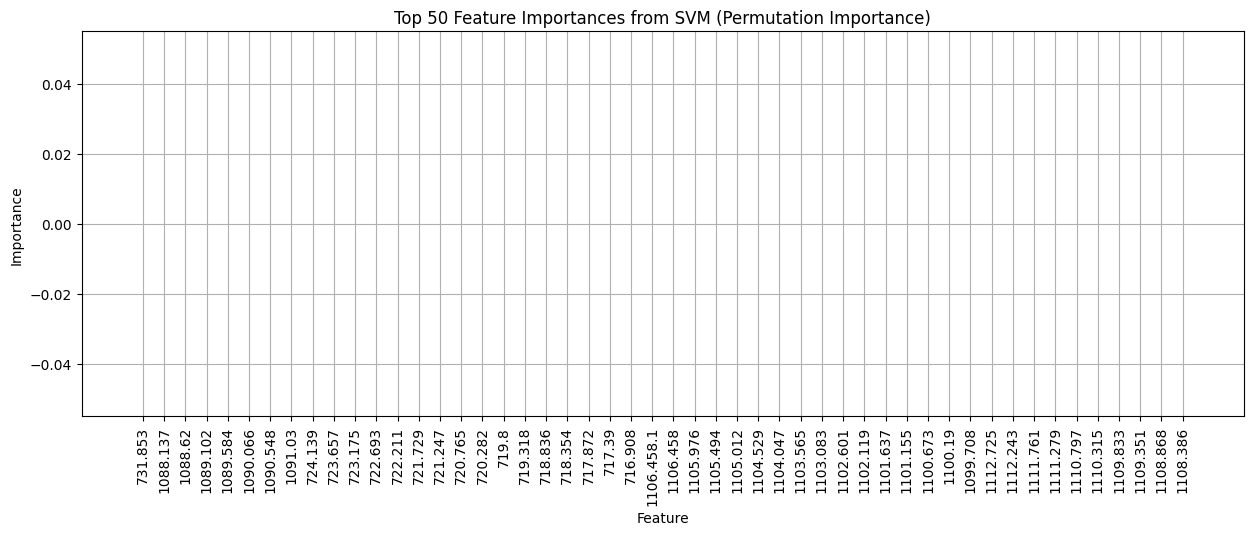

In [31]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances on the test set
perm_importance = permutation_importance(svm, X_scaled, y_encoded, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame for permutation importances
svm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance
svm_importance_df = svm_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(svm_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.bar(svm_importance_df['Feature'][:50], svm_importance_df['Importance'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importances from SVM (Permutation Importance)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [29]:
from sklearn.feature_selection import RFE
from sklearn.svm import  LinearSVC


In [30]:
# Initialize the linear SVM classifier for RFE
svc = LinearSVC(max_iter=10000, random_state=42)

# Perform RFE with the linear SVM to rank features
selector = RFE(estimator=svc, n_features_to_select=50, step=1)
selector = selector.fit(X_scaled, y_encoded)

# Get the ranking of the features
ranking = selector.ranking_
important_features = [features_v0w[i] for i in range(len(ranking)) if ranking[i] == 1]

print("Top 50 most important features:")
print(important_features)

# Now you can use these important features to perform further analysis or visualization.

c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cp

Top 50 most important features:
['1104.047', '1106.458', '1106.94.1', '1107.904', '1121.404', '1237.112', '1373.068', '1410.674', '1415.495', '1422.726', '1494.562', '1517.703', '1530.238', '1561.576', '1567.361', '1575.075', '1589.057', '1644.018', '1682.105', '1697.533', '1704.283', '1717.782', '1738.995', '1742.852', '1748.155', '1761.172', '1770.815', '1776.118', '1792.51', '1848.435', '1852.775', '1859.524', '1873.988', '1888.451', '1892.79', '1894.237', '1906.772', '1909.664', '1934.252', '1941.966', '2003.195', '2844.006', '2845.453', '2848.828', '2850.756', '2927.413', '2944.769', '2996.837', '727.032', '729.443']
